# Import

In [1]:
import numpy as np
import pandas as pd


from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [43]:
#匯入資料
df_train = pd.read_csv('C:/Users/USER/Desktop/Github/Data Used/BikeSharedDemand_train.csv')
df_test = pd.read_csv('C:/Users/USER/Desktop/Github/Data Used/BikeSharedDemand_test.csv')

In [44]:
#養成備份的習慣~
df_train_backup1 = df_train
df_test_backup1 = df_test

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# Preprocessing

發現資料處理得很好都沒有空值！但別開心得太早！

(保持對資料的警覺，有可能他們提供的資料先被一些不好的方法的填補了空值)~~

In [47]:
#看看資料分佈:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [48]:
#確認一下離群值:
print("The shape of data before remove outliers: ",df_train.shape)

#超過正負3倍標準差定義為離群值:
df_train = df_train[np.abs(df_train["count"]-df_train["count"].mean())<=(3*df_train["count"].std())]
df_train = df_train[np.abs(df_train["registered"]-df_train["registered"].mean())<=(3*df_train["registered"].std())]
df_train = df_train[np.abs(df_train["casual"]-df_train["casual"].mean())<=(3*df_train["casual"].std())]


The shape of data before remove outliers:  (10886, 12)


In [49]:
print("The shape of data after remove outliers: ",df_train.shape)

The shape of data after remove outliers:  (10282, 12)


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10282 non-null object
season        10282 non-null int64
holiday       10282 non-null int64
workingday    10282 non-null int64
weather       10282 non-null int64
temp          10282 non-null float64
atemp         10282 non-null float64
humidity      10282 non-null int64
windspeed     10282 non-null float64
casual        10282 non-null int64
registered    10282 non-null int64
count         10282 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.0+ MB


In [51]:
#養成備份的好習慣~~
df_train_backup2 = df_train

In [52]:
#df_train = df_train_backup2

In [53]:
#為了處理時間格式問題，先合併資料集:
data = df_train.append(df_test,sort=False)
data.reset_index(inplace = True)
data.drop('index',inplace = True,axis = 1)

In [54]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


使用datetime.strptime()來切割時間:

In [55]:
from datetime import datetime

In [56]:
data["weekday"] = data["datetime"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday())

In [57]:
data["year"] = data.datetime.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S").year)

In [58]:
data["month"] = data.datetime.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S").month)

In [59]:
data["hour"] = data.datetime.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)

In [60]:
data["date"] = data.datetime.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S").date())

In [61]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,hour,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,5,2011,1,0,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,5,2011,1,1,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,5,2011,1,2,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,5,2011,1,3,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,5,2011,1,4,2011-01-01


# EDA

觀察數值型態的變數:
    
    1.)temp
    
    2.)atemp
    
    3.)humidty
    
    4.)windspeed

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

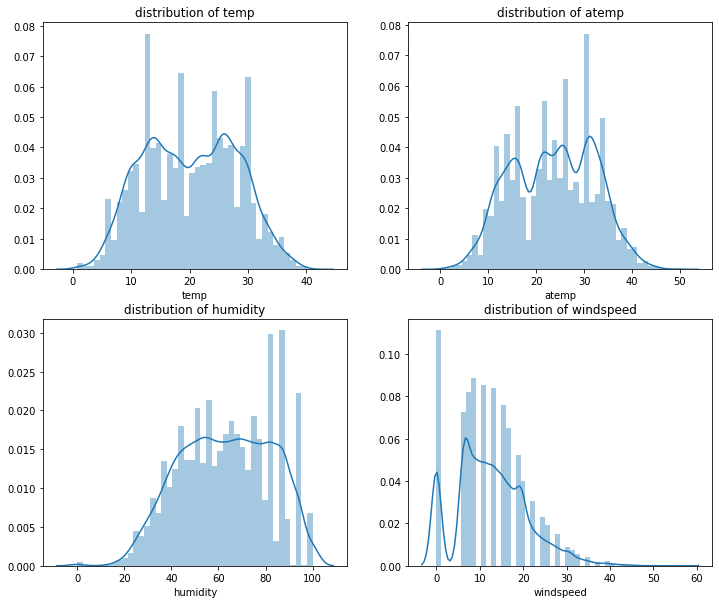

In [62]:
#使用seaborn的displot
# histagram + kernal

fig, axes = plt.subplots(nrows=2,ncols=2) #4張圖一起顯示
fig.set_size_inches(12, 10)

sns.distplot(data["temp"],ax=axes[0][0])
sns.distplot(data["atemp"],ax=axes[0][1])
sns.distplot(data["humidity"],ax=axes[1][0])
sns.distplot(data["windspeed"],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='atemp',title="distribution of atemp")
axes[1][0].set(xlabel='humidity',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")

在右下方風速的圖可以發現風速為0的值非常多，而靠近0的(大約風速6,7以內都沒有出現)，中間也出現許多沒有任何值的情況，因此可以大概推論風速0是風速太小量不到或是只要是風速為空值都被資料提供方補上0！

這種的0會對大部分的模型造成預估失準，因此我們要將風速為0的值重新估計。

先將資料分為1.)風速為0 以及2.)風速不為0:

    1.)視為遺漏值，需要填補(這裡用隨機森林方法估計)

    2.)用作測試資料來訓練隨機森林

In [63]:
dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0] #預測模型所使用的訓練資料

In [64]:
rfModel_wind_missingValue = RandomForestRegressor(n_estimators=1000,
                                                 random_state=42)

In [65]:
training_columns = ["season","weather","humidity","month","temp","year","atemp","hour"] #要用這些欄位來預測遺失的windspeed

In [66]:
dataWindNot0[training_columns] #預測模型所使用的訓練資料

,season,weather,humidity,month,temp,year,atemp,hour
5,1,2,75,1,9.84,2011,12.880,5
10,1,1,76,1,15.58,2011,19.695,10
11,1,1,81,1,14.76,2011,16.665,11
12,1,1,77,1,17.22,2011,21.210,12
13,1,2,72,1,18.86,2011,22.725,13
...,...,...,...,...,...,...,...,...
16770,1,2,60,12,10.66,2012,12.880,19
16771,1,2,60,12,10.66,2012,12.880,20
16772,1,1,60,12,10.66,2012,12.880,21
16773,1,1,56,12,10.66,2012,13.635,22


In [67]:
dataWindNot0["windspeed"] #預測模型中的目標函數

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
16770    11.0014
16771    11.0014
16772    11.0014
16773     8.9981
16774     8.9981
Name: windspeed, Length: 14653, dtype: float64

In [68]:
rfModel_wind_missingValue.fit(dataWindNot0[training_columns],dataWindNot0["windspeed"])

#調參:
#預設值:
#RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
 #                     max_features='auto', max_leaf_nodes=None,
  #                    min_impurity_decrease=0.0, min_impurity_split=None,
   #                   min_samples_leaf=1, min_samples_split=2,
    #                  min_weight_fraction_leaf=0.0, n_estimators=1000,
     #                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
      #                warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [69]:
#用隨機森林預測遺失值:
wind0_value = rfModel_wind_missingValue.predict(X=dataWind0[training_columns])
wind0_value

array([ 6.54773647,  6.39293855,  6.32196545, ...,  8.5227551 ,
       24.0071385 ,  9.55511589])

In [70]:
#填補:
dataWind0["windspeed"] = wind0_value

data = dataWindNot0.append(dataWind0,sort = False)
data.reset_index(inplace = True)
data.drop('index',inplace = True, axis = 1)

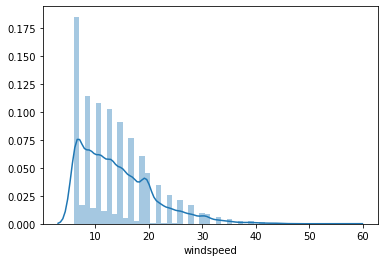

In [71]:
sns.distplot(data["windspeed"])  #相比之前，分布正常多了!

In [72]:
data_backup3 = data

In [40]:
#data = data_backup3

觀察另三個變數:
都有遺失值:

casual        10282 non-null float64

registered    10282 non-null float64

count         10282 non-null float64

In [73]:
def overview_data(df):
    
    print('資料全覽')
    df.info()
    print('---------------------------------')
    print('rows(資料筆數): ',df.shape[0])
    
    print('---------------------------------')
    print('features(特徵數):  ' , df.shape[1])
    
    print('---------------------------------')
    print('Number of missing value(遺失值) :')
    
    print('---------------------------------')
    print('遺失值分佈:')
    print('---------------------------------')
    print(df.isnull().any())
    
    print('---------------------------------')
    print('遺失值總數:', df.isnull().sum().values.sum())
    
    print('---------------------------------')
    print('每欄位有多少種值:')
    print('---------------------------------')
    print(df.nunique())

In [74]:
overview_data(data)

資料全覽
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16775 entries, 0 to 16774
Data columns (total 17 columns):
datetime      16775 non-null object
season        16775 non-null int64
holiday       16775 non-null int64
workingday    16775 non-null int64
weather       16775 non-null int64
temp          16775 non-null float64
atemp         16775 non-null float64
humidity      16775 non-null int64
windspeed     16775 non-null float64
casual        10282 non-null float64
registered    10282 non-null float64
count         10282 non-null float64
weekday       16775 non-null int64
year          16775 non-null int64
month         16775 non-null int64
hour          16775 non-null int64
date          16775 non-null object
dtypes: float64(6), int64(9), object(2)
memory usage: 2.2+ MB
---------------------------------
rows(資料筆數):  16775
---------------------------------
features(特徵數):   17
---------------------------------
Number of missing value(遺失值) :
---------------------------------
遺失值分佈:
--

三個欄位有遺失值:
casual         
registered     
count          

先處理casual欄位:

In [75]:
#先區分出預測用的訓練資料和測試資料:
trainData = data[data["casual"].isna() == False]
testData = data[data["casual"].isna() == True]

#用訓練資料來訓練模型:
rfModel_missingValue = RandomForestRegressor(n_estimators=1000,
                                                 random_state=42)

training_columns = ["season","weather","humidity","month","temp","year","atemp","hour"]

trainData[training_columns] #預測模型所使用的訓練資料

trainData["casual"] #預測模型中的目標函數

#套用模型:
rfModel_missingValue.fit(trainData[training_columns],trainData["casual"])

#用模型對測試資料做預測:
fillIn_value = rfModel_missingValue.predict(X=testData[training_columns])
fillIn_value

#填補遺失值:
testData["casual"] = fillIn_value

data = trainData.append(testData,sort = False)
data.reset_index(inplace = True)
data.drop('index',inplace = True, axis = 1)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16775 entries, 0 to 16774
Data columns (total 17 columns):
datetime      16775 non-null object
season        16775 non-null int64
holiday       16775 non-null int64
workingday    16775 non-null int64
weather       16775 non-null int64
temp          16775 non-null float64
atemp         16775 non-null float64
humidity      16775 non-null int64
windspeed     16775 non-null float64
casual        16775 non-null float64
registered    10282 non-null float64
count         10282 non-null float64
weekday       16775 non-null int64
year          16775 non-null int64
month         16775 non-null int64
hour          16775 non-null int64
date          16775 non-null object
dtypes: float64(6), int64(9), object(2)
memory usage: 2.2+ MB


In [77]:
data_backup4 = data

In [78]:
#data = data_backup4

處理registered欄位:

In [79]:
#先區分出預測用的訓練資料和測試資料:
trainData = data[data["registered"].isna() == False]
testData = data[data["registered"].isna() == True]

#用訓練資料來訓練模型:
rfModel_missingValue = RandomForestRegressor(n_estimators=1000,
                                                 random_state=42)

training_columns = ["season","weather","humidity","month","temp","year","atemp","hour"]

trainData[training_columns] #預測模型所使用的訓練資料

trainData["registered"] #預測模型中的目標函數

#套用模型:
rfModel_missingValue.fit(trainData[training_columns],trainData["registered"])

#用模型對測試資料做預測:
fillIn_value = rfModel_missingValue.predict(X=testData[training_columns])
fillIn_value

#填補遺失值:
testData["registered"] = fillIn_value

data = trainData.append(testData,sort = False)
data.reset_index(inplace = True)
data.drop('index',inplace = True, axis = 1)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16775 entries, 0 to 16774
Data columns (total 17 columns):
datetime      16775 non-null object
season        16775 non-null int64
holiday       16775 non-null int64
workingday    16775 non-null int64
weather       16775 non-null int64
temp          16775 non-null float64
atemp         16775 non-null float64
humidity      16775 non-null int64
windspeed     16775 non-null float64
casual        16775 non-null float64
registered    16775 non-null float64
count         10282 non-null float64
weekday       16775 non-null int64
year          16775 non-null int64
month         16775 non-null int64
hour          16775 non-null int64
date          16775 non-null object
dtypes: float64(6), int64(9), object(2)
memory usage: 2.2+ MB


In [81]:
data_backup5 = data

因為是目標函數，所以不處理count欄位(因為之後會根據有遺失值與否區分出測試資料和訓練資料)

接下來準備進行最後的隨機森林模型，先區分出訓練資料和測試資料:

In [82]:
#count欄位無遺失值的部分為訓練資料集:

dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])  
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 9027 to 9026
Data columns (total 17 columns):
datetime      10282 non-null object
season        10282 non-null int64
holiday       10282 non-null int64
workingday    10282 non-null int64
weather       10282 non-null int64
temp          10282 non-null float64
atemp         10282 non-null float64
humidity      10282 non-null int64
windspeed     10282 non-null float64
casual        10282 non-null float64
registered    10282 non-null float64
count         10282 non-null float64
weekday       10282 non-null int64
year          10282 non-null int64
month         10282 non-null int64
hour          10282 non-null int64
date          10282 non-null object
dtypes: float64(6), int64(9), object(2)
memory usage: 1.4+ MB


In [83]:
##count欄位有遺失值的部分為測試資料集:

dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 10282 to 15907
Data columns (total 17 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
casual        6493 non-null float64
registered    6493 non-null float64
count         0 non-null float64
weekday       6493 non-null int64
year          6493 non-null int64
month         6493 non-null int64
hour          6493 non-null int64
date          6493 non-null object
dtypes: float64(6), int64(9), object(2)
memory usage: 913.1+ KB


In [84]:
datetimecol = dataTest["datetime"] #這是最後輸出CSV格式的欄位，因為之後分析的時候dataTest會移除掉這欄位，所以這裡先設定起來

yLabels = dataTrain["count"]

yLabelsLog = np.log(yLabels) #對數轉換讓他更加fit常態分佈

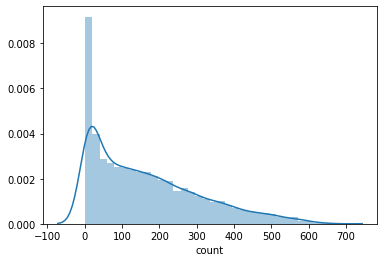

In [85]:
sns.distplot(yLabels) #轉換之前

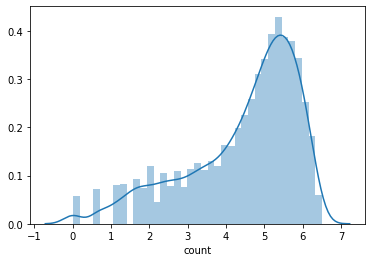

In [87]:
yLabelsLog = np.log(yLabels)
sns.distplot(yLabelsLog) #轉換之後

In [88]:
dropFeatures = ['casual',"count","datetime","date","registered"]  #訓練資料和測試資料中都去掉目標函數count
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [90]:
dataTrain_backup = dataTrain
dataTest_backup = dataTest

In [91]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 9027 to 9026
Data columns (total 12 columns):
season        10282 non-null int64
holiday       10282 non-null int64
workingday    10282 non-null int64
weather       10282 non-null int64
temp          10282 non-null float64
atemp         10282 non-null float64
humidity      10282 non-null int64
windspeed     10282 non-null float64
weekday       10282 non-null int64
year          10282 non-null int64
month         10282 non-null int64
hour          10282 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1.0 MB


In [92]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 10282 to 15907
Data columns (total 12 columns):
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
weekday       6493 non-null int64
year          6493 non-null int64
month         6493 non-null int64
hour          6493 non-null int64
dtypes: float64(3), int64(9)
memory usage: 659.4 KB


In [94]:
rfModel = RandomForestRegressor(n_estimators=1000,random_state=42)

rfModel.fit(dataTrain,yLabelsLog)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [96]:
#訓練資料中的預測:
preds = rfModel.predict(X= dataTrain)
preds

array([3.00713132, 3.42205423, 3.20888678, ..., 5.17300399, 4.92908714,
       4.57030668])

In [97]:
#測試資料中的預測:
predsTest = rfModel.predict(X= dataTest)
predsTest


array([2.36807591, 1.56636436, 1.04224182, ..., 4.91340087, 4.67551118,
       4.05349342])

In [99]:
#要輸出成CSV檔案再上傳Kaggle:

submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)] #exp是因為之前做過對數轉換，必須再轉回來!!
    })

submission.to_csv('bike_predictions_RF.csv', index=False)

submission

,datetime,count
10282,2011-01-20 00:00:00,10.676829
15908,2011-01-20 01:00:00,4.789205
15909,2011-01-20 02:00:00,2.835567
10283,2011-01-20 03:00:00,2.962121
10284,2011-01-20 04:00:00,2.495604
...,...,...
15903,2012-12-31 19:00:00,295.094553
15904,2012-12-31 20:00:00,201.462386
15905,2012-12-31 21:00:00,136.101491
15906,2012-12-31 22:00:00,107.287397
